In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [32]:
path = rf'C:\Users\mqalborn\Desktop\BiophysicalTraits\results/prosail.csv'

params_prosail = pd.read_csv(path).drop(['Unnamed: 0'], axis=1)

path = rf'C:\Users\mqalborn\Desktop\BiophysicalTraits\results/rho_canopy_vec.csv'
rho_prosail = pd.read_csv(path).drop('Unnamed: 0', axis=1).reset_index()
prosail = pd.merge(params_prosail, rho_prosail)
print(prosail.head())

   index    N_leaf        Cab        Car    Cbrown        Cw        Cm  \
0    0.0  2.537475  59.729934  21.313154  0.823622  0.041128  0.014585   
1    1.0  2.151270  59.729934  21.313154  0.823622  0.041128  0.014585   
2    2.0  2.537475  97.773658  21.313154  0.823622  0.041128  0.014585   
3    3.0  2.537475  59.729934   1.222446  0.823622  0.041128  0.014585   
4    4.0  2.537475  59.729934  21.313154  0.180542  0.041128  0.014585   

         Ant       LAI  leaf_angle  ...       B02       B03       B04  \
0  25.821387  2.283687   78.780064  ...  0.039324  0.071524  0.104722   
1  25.821387  2.283687   78.780064  ...  0.019103  0.030056  0.044936   
2  25.821387  2.283687   78.780064  ...  0.039095  0.056441  0.078144   
3  25.821387  2.283687   78.780064  ...  0.042233  0.068722  0.102518   
4  25.821387  2.283687   78.780064  ...  0.045066  0.065054  0.087632   

        B05       B06       B07       B08       B8A       B11       B12  
0  0.164977  0.370635  0.496256  0.558964 

In [68]:
prosail.loc[:, 'NDVI'] = (prosail.B08 - prosail.B04) / (prosail.B08 + prosail.B04)
prosail_LAI = prosail[['LAI', 'Cab', 'NDVI', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']]
prosail_LAI = prosail_LAI.melt(
    id_vars=['LAI', 'Cab', 'NDVI'],
    var_name="bands",
    value_name="rho"
)

col_name = 'Wavelength'
con = prosail_LAI.bands == 'B02'
prosail_LAI.loc[con, col_name] = 496.6
con = prosail_LAI.bands == 'B03'
prosail_LAI.loc[con, col_name] = 560
con = prosail_LAI.bands == 'B04'
prosail_LAI.loc[con, col_name] = 664.5
con = prosail_LAI.bands == 'B05'
prosail_LAI.loc[con, col_name] = 703.9
con = prosail_LAI.bands == 'B06'
prosail_LAI.loc[con, col_name] = 740.2
con = prosail_LAI.bands == 'B07'
prosail_LAI.loc[con, col_name] = 782.5
con = prosail_LAI.bands == 'B08'
prosail_LAI.loc[con, col_name] = 835.1
con = prosail_LAI.bands == 'B8A'
prosail_LAI.loc[con, col_name] = 864.8
con = prosail_LAI.bands == 'B11'
prosail_LAI.loc[con, col_name] = 1613.7
con = prosail_LAI.bands == 'B12'
prosail_LAI.loc[con, col_name] = 2202.4

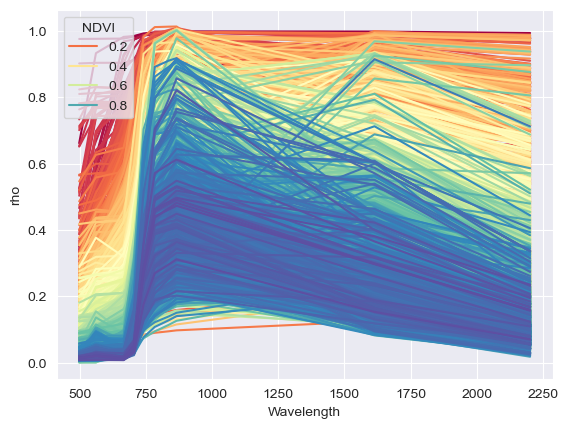

In [73]:
sns.lineplot(data=prosail_LAI, x=col_name, y='rho', hue='NDVI', palette="Spectral")
plt.show()

<Axes: xlabel='LAI', ylabel='Cab'>

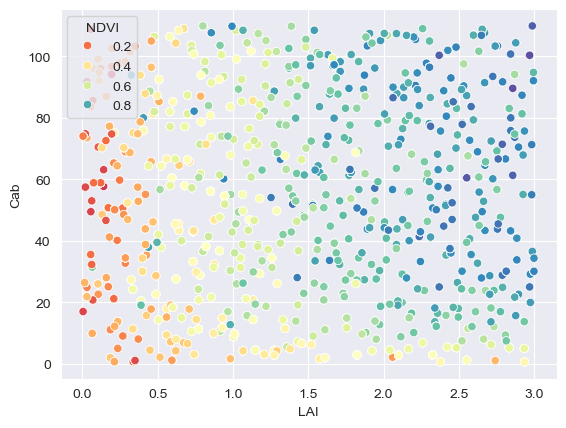

In [71]:
sns.scatterplot(data=prosail_LAI, x='LAI', y='Cab', hue='NDVI', palette="Spectral")